In [1]:
#!ls ~/trained_models

In [8]:
#!ls ~/trained_models/
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

# dataset_path = Path.home()/'datasets/trainset_unbalanced'
dataset_path = Path.home()/'datasets/NEW_ENCODING'
model_path = Path.home()/'trained_models/dragon_5hops_5heads_3linear__NEW_ENCODING.pt'

In [9]:
dataset = load_dataset_from_path(dataset_path)
df = dataset.read_vars_csv()
df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1084201,"17,29,53,79,79,87",local_c,int32,stack,NaN,-12.0,BUILTIN,int32,i,...,False,4,LLL,L,L,L,1000,l,False,False
1,1084294,"12,24,44,69,69,77",local_c,int32,stack,NaN,-12.0,BUILTIN,int32,i,...,False,4,LLL,L,L,L,1000,l,False,False
2,1084377,"27,64,89",lVar2,int64,register,rax,0.0,BUILTIN,int64,asset,...,False,0,PLL,P,L,L,1000,l,False,False
3,1084377,"43,56,101",lVar3,int64,register,rax,0.0,BUILTIN,int64,asset_00,...,False,0,PLL,P,L,L,1000,l,False,False
4,1084488,"27,33",iVar1,int32,register,eax,0.0,BUILTIN,int32,iVar1,...,False,4,LLL,L,L,L,1000,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,1064939,"12,23",param_1,int64,register,rdi,56.0,BUILTIN,int64,fp,...,False,1,PLL,P,L,L,1008,p,False,False
24675,1064972,17,param_1,uchar,register,dil,56.0,BUILTIN,uchar,timestamp,...,False,1,LLL,L,L,L,1008,p,False,False
24676,1064998,16,param_1,uchar*,register,rdi,56.0,PTR,"PTR,uchar",fmt,...,False,1,PLL,P,L,L,1008,p,False,False
24677,1065701,"295,482",param_9,char*,register,rdi,56.0,PTR,"PTR,char",format,...,False,1,PLL,P,L,L,1008,p,False,False


<Axes: xlabel='LeafCategory'>

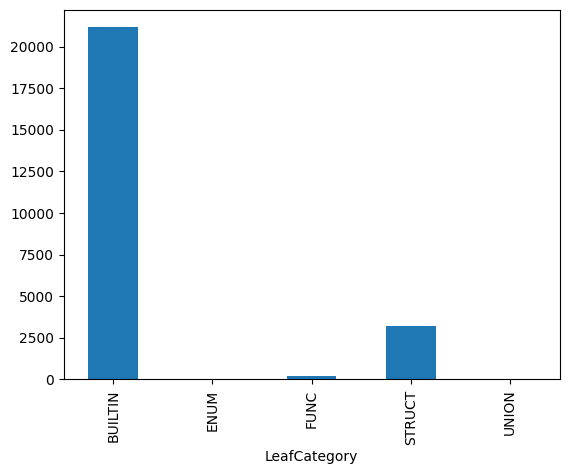

In [10]:
#df.groupby('TypeCategory_Debug').count().FunctionStart.plot(kind='bar')
[x for x in df.columns if 'Leaf' in x]
df.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

In [12]:
df.groupby('LeafCategory').count()[['FunctionStart']]

,FunctionStart
LeafCategory,
BUILTIN,21147
ENUM,43
FUNC,226
STRUCT,3225
UNION,38


In [18]:
len(df)

24679

In [89]:
# Ok - let's try setting aside ALL our "unicorn" samples and then balancing down the remainder
# Unicorns: minorities for PtrL3, PtrL2, and LeafCategory (enum/func/union)
# keep_p3s = df.PtrL3.isin(['A','P'])
# keep_p2s = df.PtrL2.isin(['A','P'])     # this includes all PtrL3's

keep_p1s = df.PtrL1.isin(['A','P'])     # this includes ALL non-leaf PtrL2/PtrL3 (plus other variants where PtrL1 is non-leaf)
keep_leaf_cats = df.LeafCategory.isin(['ENUM','FUNC','UNION'])
keep_unicorns = keep_leaf_cats | keep_p1s

# df.groupby('PtrL3').count()
# df[keep_p1s].groupby('PtrLevels').count().FunctionStart.plot(kind='bar',rot=0)
len(df[keep_p1s])
len(df[keep_unicorns])

keep_df = df[keep_unicorns]
keep_df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
2,1084377,"27,64,89",lVar2,int64,register,rax,0.0,BUILTIN,int64,asset,...,False,0,PLL,P,L,L,1000,l,False,False
3,1084377,"43,56,101",lVar3,int64,register,rax,0.0,BUILTIN,int64,asset_00,...,False,0,PLL,P,L,L,1000,l,False,False
14,1084990,"2676,2739,2743,2...",pfVar4,float*,register,rax,0.0,PTR,"PTR,float",prVar6,...,False,0,PLL,P,L,L,1000,l,False,False
15,1084990,"3575,3596",uVar5,uint64,register,rax,0.0,BUILTIN,uint64,camera,...,False,0,PLL,P,L,L,1000,l,False,False
18,1084990,"1897,2936",local_240,uint64,stack,NaN,-576.0,BUILTIN,uint64,local_240,...,False,0,PLL,P,L,L,1000,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,1064879,"30,48",param_2,int64,register,rsi,48.0,BUILTIN,int64,fp,...,False,1,PLL,P,L,L,1008,p,False,False
24674,1064939,"12,23",param_1,int64,register,rdi,56.0,BUILTIN,int64,fp,...,False,1,PLL,P,L,L,1008,p,False,False
24676,1064998,16,param_1,uchar*,register,rdi,56.0,PTR,"PTR,uchar",fmt,...,False,1,PLL,P,L,L,1008,p,False,False
24677,1065701,"295,482",param_9,char*,register,rdi,56.0,PTR,"PTR,char",format,...,False,1,PLL,P,L,L,1008,p,False,False


<Axes: xlabel='LeafCategory'>

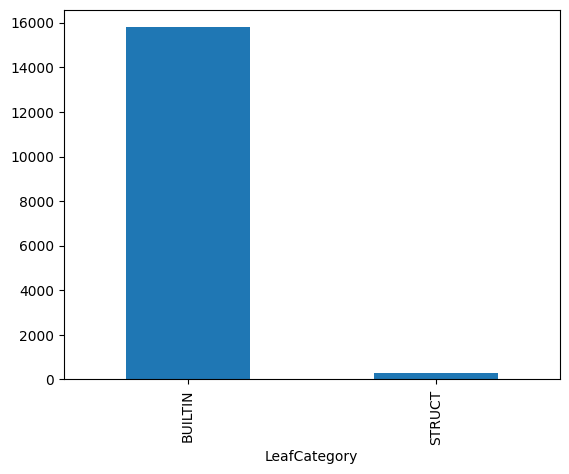

In [97]:
len(df[~keep_unicorns])
df[~keep_unicorns].groupby('LeafCategory').count().FunctionStart.plot(kind='bar')
#df[~keep_unicorns].groupby('PtrLevels').count().FunctionStart.plot(kind='bar')

In [ ]:

sample_n = df[~keep_unicorns].groupby('LeafCategory').count().FunctionStart.min()
print(f'Randomly sampling {sample_n:,} items from each remaining leaf category')
sampled_df = df.loc[~keep_unicorns,:].groupby('LeafCategory').sample(n=sample_n)
sampled_df.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='LeafCategory'>

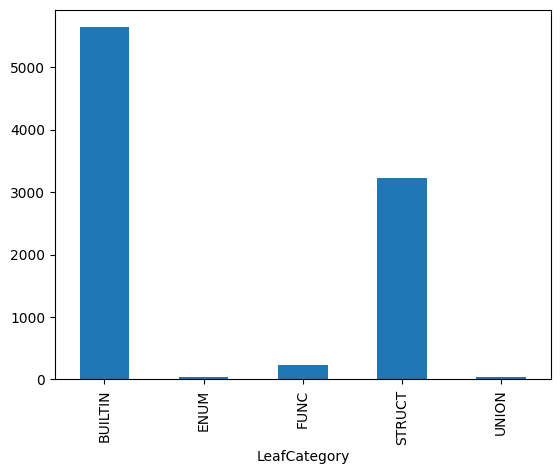

In [90]:
#sampled_df.groupby('LeafCategory').count()
# keep_df.groupby('LeafCategory').count()
balanced_df = pd.concat([keep_df, sampled_df])
balanced_df.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='PtrLevels'>

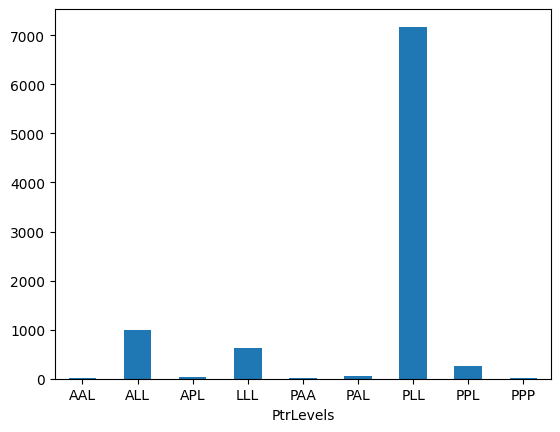

In [91]:
balanced_df.groupby('PtrLevels').count().FunctionStart.plot(kind='bar',rot=0)

<Axes: xlabel='PtrLevels'>

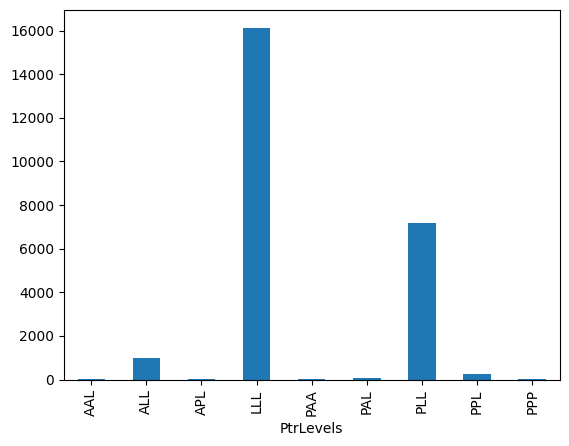

In [11]:
df.groupby('PtrLevels').count().FunctionStart.plot(kind='bar')

In [41]:
balanced_df.groupby('PtrL3').count()#.FunctionStart.plot(kind='bar')
#balanced_df
df.groupby('PtrL3').count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
PtrL3,,,,,,,,,,,,,,,,,,,,,
A,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
L,24660,24660,24660,24660,24645,12897,24660,24660,24660,24660,...,24660,24660,24660,24660,24660,24660,24660,24660,24660,24660
P,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


<Axes: xlabel='PtrLevels'>

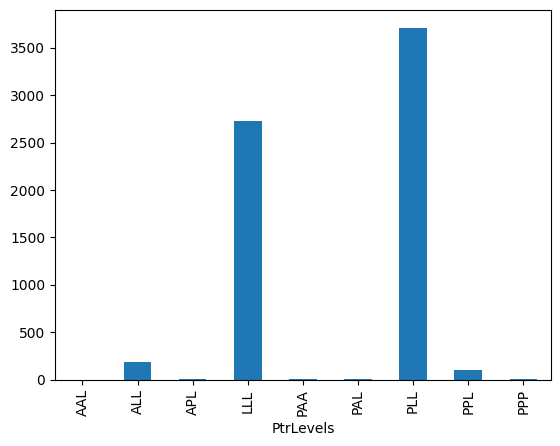

In [35]:
balanced_df.groupby('PtrLevels').count().FunctionStart.plot(kind='bar')

In [5]:
# min_val = df.groupby('LeafCategory').count().FunctionStart.min()
# df.groupby('LeafCategory').sample(n=min_val).groupby('LeafCategory').count().FunctionStart.plot(kind='bar')
# [x for x in df.columns]

In [7]:
from datatype_recovery.models.eval import make_predictions_on_dataset

model_pred = make_predictions_on_dataset(model_path, 'cpu', dataset)

DragonModel(
  (gat_layers): ModuleList(
    (0): GATConv(86, 128, heads=5)
    (1-4): 4 x GATConv(640, 128, heads=5)
  )
  (shared_linear_layers): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
  )
  (ptr_l1_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l2_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l3_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (leaf_category_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True

  0%|          | 0/1572 [00:00<?, ?it/s]

 38%|███▊      | 591/1572 [13:08<21:48,  1.33s/it] 


KeyboardInterrupt: 

In [8]:
model_pred

# TODO - train the model as-is and see how we do...
# TODO: rebuild coreutils with new encoding (for eval purposes...)
# TODO: update this eval notebook and compute RESULTS
# TODO - update model to feed some outputs into other task-specific layers (see diagram)
# TODO - retrain with bigger dataset (w/e my custom training dataset was before?)
# TODO - balance by leaf category? or by ptr levels?
# TODO - overall accuracy? raw vs. corrected?
# TODO - individual classifiers? (leaf category, ptrl1, floating, signed...)
# TODO - accuracy on PTR,STRUCT true types?
#           -> locals vs. params? non-unique? register? ...
# TODO - eval on benchmarks vs. others (DIRTY, OSPREY, StateFormer...?)
# TODO - ok, what other experiments do we need to run to publish?
# ---> evaluate scalability?

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1084201,"17,29,53,79,79,87",l,",int32",int32,LLL,L,L,L,BUILTIN,True,False,4
1,1000,1084201,43,p,",uchar",uchar,LLL,L,L,L,BUILTIN,False,False,1
2,1000,1084294,"12,24,44,69,69,77",l,",int32",int32,LLL,L,L,L,BUILTIN,True,False,4
3,1000,1084377,"27,64,89",l,"PTR,int32","PTR,int32",PLL,P,L,L,BUILTIN,True,False,4
4,1000,1084377,"43,56,101",l,"PTR,int32","PTR,int32",PLL,P,L,L,BUILTIN,True,False,4
5,1000,1084488,"27,33",l,",int32",int32,LLL,L,L,L,BUILTIN,True,False,4
6,1000,1084537,"24,29,70,75",l,",float",float,LLL,L,L,L,BUILTIN,True,True,4
7,1000,1084537,"38,43,84,89,172,198",l,",int32",int32,LLL,L,L,L,BUILTIN,True,False,4
8,1000,1084537,"190,212",l,",int32",int32,LLL,L,L,L,BUILTIN,True,False,4
9,1000,1084537,"52,57",l,",double",double,LLL,L,L,L,BUILTIN,True,True,8


In [9]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cstew33 (uah-phd). Use `wandb login --relogin` to force relogin


True

In [10]:
from datatype_recovery.models.training import *

train_model(model_path, dataset_path, 'DebugEncoding', 0.7, 64, num_epochs=5)


Train set: 17,216 samples (69.76%)
Test set: 7,424 samples (30.08%)
Batch size: 64
Total usable dataset size (batch-aligned): 24,640
Loss due to batch alignment: 39 (0.16%)
Using device cuda:0


Training for 5 epochs
---------------
Current device: cuda:0
Current CUDA device: 0 (Tesla M10)
Computing initial accuracy/loss...


100%|██████████| 116/116 [00:17<00:00,  6.80it/s]

Train Acc = 53.91%,Train Acc Raw = 13.01%,Train Loss = 0.0299
Test Acc = 55.46%,Test Acc Raw = 13.16%,Test Loss = 0.0302


  0%|          | 0/5 [00:00<?, ?it/s]

Computing final accuracy/loss...


100%|██████████| 116/116 [00:15<00:00,  7.31it/s]


Train Acc = 79.43%,Train Acc Raw = 23.97%,Train Loss = 0.0137
Test Acc = 80.02%,Test Acc Raw = 25.35%,Test Loss = 0.0139


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Test Acc,▁▂▅▇█
Test Acc Raw,▁▃▅▇█
Test Loss,█▇▄▂▁
Train Acc,▁▂▅▇█
Train Acc Raw,▁▃▆▇█
Train Loss,█▇▄▂▁
Test Acc,0.80024
Test Acc Raw,0.2535
Test Loss,0.01393
Train Acc,0.79426
Train Acc Raw,0.23972
